Installing gdown to download the dataset directly in the notebook

In [25]:
!pip install gdown

You should consider upgrading via the 'C:\Users\admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Importing gdown and giving the url of the dataset (milk quality prediction)

In [26]:
import gdown
dataset = "https://drive.google.com/u/1/uc?id=1og7VEkM0W1JSHqCM400i7lq29Ue5Mt2X&export=download"
file = "data.zip"
gdown.download(dataset, file)

Downloading...
From: https://drive.google.com/u/1/uc?id=1og7VEkM0W1JSHqCM400i7lq29Ue5Mt2X&export=download
To: C:\Users\admin\Desktop\AI\data.zip
100%|█████████████████████████████████████████████████████████████████████████████| 1.27k/1.27k [00:00<00:00, 1.27MB/s]


'data.zip'

Unzipping the zipfile containing dataset.

In [27]:
import zipfile as zf
zfiles = zf.ZipFile("data.zip",'r')
zfiles.extractall()
zfiles.close()

Importing pandas

In [28]:
import pandas as pd

reading the dataset by pandas

In [29]:
df = pd.read_csv('milknew.csv')

In [30]:
df.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


Displaying information of data from dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


Describing the data

In [32]:
df.describe()  

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Describing the data to show only grade/objectype

In [33]:
df.describe(include="O") 

,Grade
count,1059
unique,3
top,low
freq,429


In [34]:
df.Taste.unique()

array([1, 0], dtype=int64)

Plotting the bargraph on odor 

<AxesSubplot:>

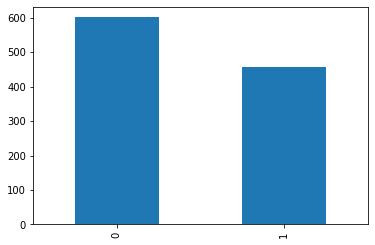

In [35]:
df.Odor.value_counts().plot.bar()

In [36]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

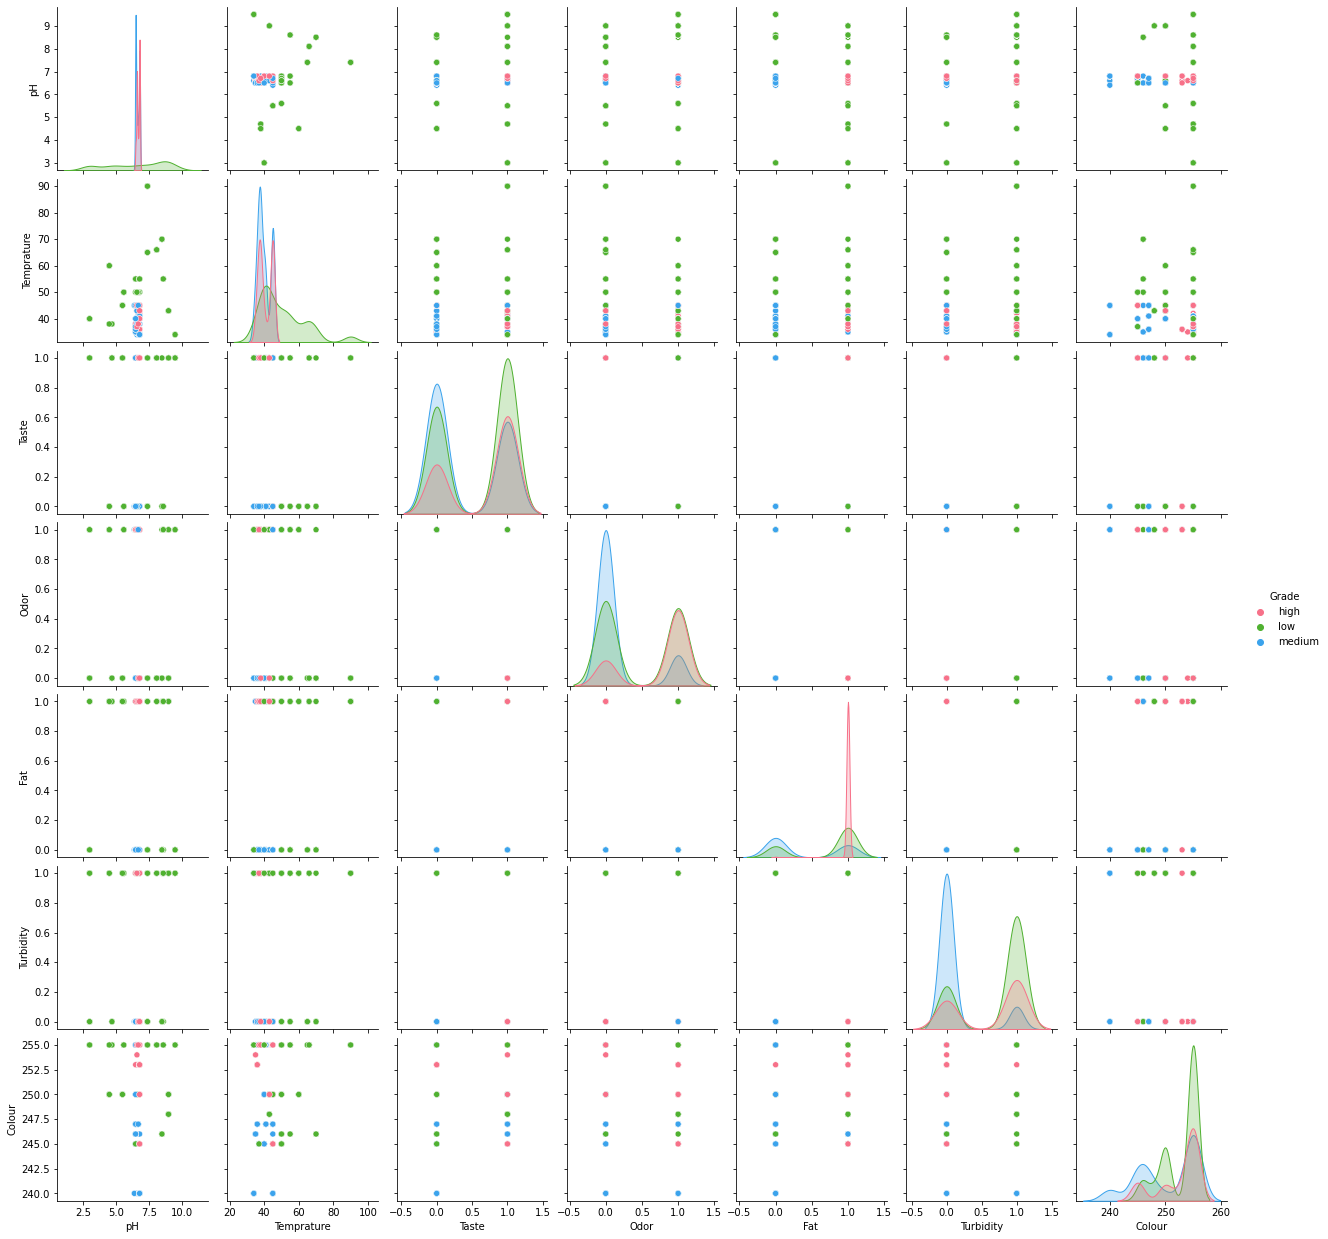

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="Grade", palette="husl",diag_kind="kde")
plt.show()

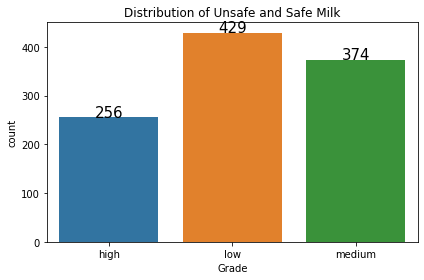

In [38]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x = df['Grade'], data = df)
plt.title("Distribution of Unsafe and Safe Milk")
# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.7,rect.get_height(),horizontalalignment='center', fontsize = 15)       
        
plt.tight_layout()
plt.show()

The quality on the basis of pH, Temperature, Taste, Odor, Fat, Turbidity, Colour and Grade

In [39]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [40]:
x = df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']] #two brackets bc data indexing
y = df['Grade']

Splitting dataset into train and test

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

Import K Nearest Neighbour(KNN) algorithm to train the train set

In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [43]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_pred = neigh.predict(X_test)

Importing confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix , classification_report, f1_score

Plotting confusion matrix

In [46]:
cf = (confusion_matrix(y_test, y_pred))

Printing the classification report on precision and f1-score

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       1.00      0.98      0.99        43
         low       1.00      1.00      1.00        91
      medium       0.99      1.00      0.99        78

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



Printing heatmap on confusion matrix

<AxesSubplot:>

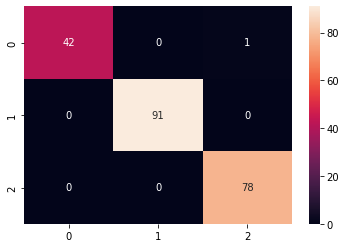

In [49]:
#import seaborn as sns
sns.heatmap(cf, annot=True)